In [4]:
## Basic Import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## Modeling 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [6]:
## Import the data as panda DataFrame
df=pd.read_csv('data/stud.csv')

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
#preparing X and Y variable
# for ex we will predict math score
X=df.drop(columns=['math score'],axis=1)
y=df['math score']

In [11]:
print("Categories in 'gender' variable:  ",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:  ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:  ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:  ",end=" ")
print(df['test preparation course'].unique())


Categories in 'gender' variable:   ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test preparation course' variable:   ['none' 'completed']


In [12]:
# Create column transformer with 3 types of transformers
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_transfromer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
     [
          ("OneHotEncode",oh_transformer,cat_features),
          ("StandardScaler",num_transfromer,num_features)
     ]
)


In [13]:
X=preprocessor.fit_transform(X)

In [15]:
X.shape

(1000, 19)

In [17]:
#split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

Create an Evaluate Function to give all metrics after model training


In [21]:
def evaluate_model(true,predicted):
     mae=mean_absolute_error(true,predicted)
     mse=mean_squared_error(true,predicted)
     rmse=np.sqrt(mse)
     r2_Score=r2_score(true,predicted)
     return mae,rmse,r2_Score

In [25]:
models={
     "Linear Regression ": LinearRegression(),
     "Lasso":Lasso(),
     "Ridge":Ridge(),
     "K-Neighbors Regressor":KNeighborsRegressor(),
     "Decision Tree":DecisionTreeRegressor(),
     "RandomForestRegressor":RandomForestRegressor(),
     "XGBRegressor":XGBRegressor(),
     "CatBoost Regressor":CatBoostRegressor(),
     "AdaBoost Regressor":AdaBoostRegressor() 
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
     model=list(models.values())[i]
     model.fit(X_train,y_train) # Train Model

     #Make Predictions
     y_train_pred=model.predict(X_train)
     y_test_pred=model.predict(X_test)

     # Evaluate Train and Test Datasets
     model_train_mae, model_train_rmse, model_train_r2=evaluate_model(y_train,y_train_pred)
     model_test_mae, model_test_rmse, model_test_r2=evaluate_model(y_test,y_test_pred)

     print(list(models.keys())[i])
     model_list.append(list(models.keys())[i])

     print('Model Perfromance for Training Set')
     print('- Root Mean Squared Error: {:.4f} '.format(model_train_rmse))
     print('- Mean Absolute Error: {:.4f}'.format(model_train_mae))
     print('- R2 Score: {:.4f}'.format(model_train_r2))

     print("------------------")

     print("Model Performance for Test set")
     print('- Root Mean Squared Error: {:.4f} '.format(model_test_rmse))
     print('- Mean Absolute Error: {:.4f}'.format(model_test_mae))
     print('- R2 Score: {:.4f}'.format(model_test_r2))
     r2_list.append(model_test_r2)

     print('='*35)
     print('\n')



Linear Regression 
Model Perfromance for Training Set
- Root Mean Squared Error: 5.3244 
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
------------------
Model Performance for Test set
- Root Mean Squared Error: 5.3960 
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803


Lasso
Model Perfromance for Training Set
- Root Mean Squared Error: 6.5938 
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
------------------
Model Performance for Test set
- Root Mean Squared Error: 6.5197 
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model Perfromance for Training Set
- Root Mean Squared Error: 5.3233 
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
------------------
Model Performance for Test set
- Root Mean Squared Error: 5.3904 
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model Perfromance for Training Set
- Root Mean Squared Error: 5.7077 
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
------------------
Model Performance for Test set
- Root Mean S

RESULTS

In [30]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2 score']).sort_values(by=["R2 score"],ascending=False)

,Model Name,R2 score
2,Ridge,0.880593
0,Linear Regression,0.880345
5,RandomForestRegressor,0.852838
8,AdaBoost Regressor,0.852404
7,CatBoost Regressor,0.851632
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.758567


Linear Regression

In [31]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of Model is %.2f" %score)

Accuracy of Model is 88.03


Plot y_pred and y_test

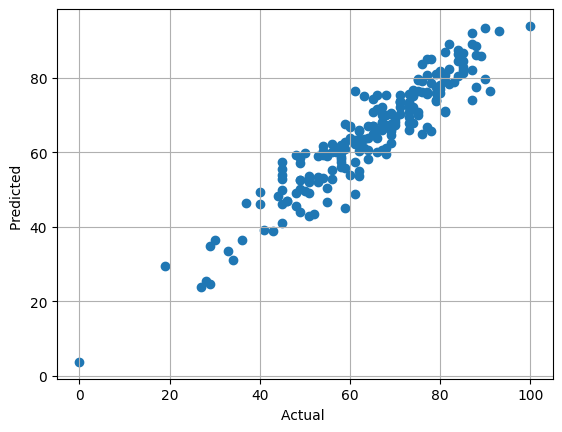

In [35]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual ")
plt.ylabel("Predicted ")
plt.grid(True)


<Axes: xlabel='math score'>

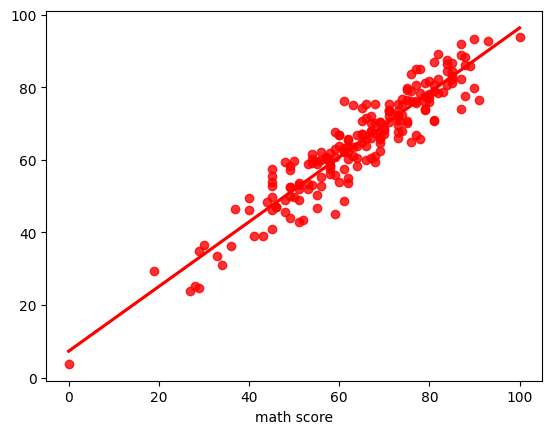

In [36]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

Difference Between Acutal and Predicted Values

In [37]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
